# Playing with Quantum States in Qiskit

**Quick reference guide to state initialization, manipulation, and visualization in Qiskit**


This notebook demonstrates some of the ways you can play with states using Qiskit, and multiple ways of achieving the same thing where applicable.  This is meant to be an easy lookup tool for when you code with Qiskit.

I'll assume you have prior knowledge of quantum states, state vectors, density matrices, quantum gates, and basic Qiskit.

If you aren't familiar with any of these, please see the following resources:
- [Qiskit Textbook Chapters 1 & 2](https://qiskit.org/textbook/ch-states/introduction.html)
- [Qiskit Textbook: Density Matrices & Mixed States](https://qiskit.org/textbook/ch-quantum-hardware/density-matrix.html)


 
    

*Click [here](https://nbviewer.jupyter.org/github/quantum-kittens/quantum-computing-basics/blob/master/Qiskit_Reference_Guides/Playing_with_Quantum_States_in_Qiskit.ipynb) to view this notebook in nbviewer*

In [ ]:
# run this cell if you're executing this notebook in your browser
!pip install qiskit

from IPython.display import clear_output
clear_output()

In [2]:
from qiskit import *
import numpy as np


n = 2 #number of qubits used for the example in this notebook

## Arbitrary State Initialization

Here's how to initialize a qubit register or quantum circuit with an arbitrary state of your choice.

Let's whip up a target state as an example:

$\left|\psi_t\right\rangle = \frac{1}{\sqrt{2}}\left|00\right\rangle + \frac{i}{\sqrt{2}}\left|10\right\rangle$


### Method 1: Using .initialize() from QuantumCircuit

In [3]:
from qiskit.visualization import array_to_latex


target_state = [ # state vector of the target state
    1/np.sqrt(n),
    0,
    (complex(0,1))/np.sqrt(n),
    0,
    ]



array_to_latex(target_state, prefix = '|\\psi_{ts}> = ' ) # a nifty, clean latex representation

<IPython.core.display.Latex object>

The seasoned quantum physicists among you might raise your eyebrows at the use of a ket here, and you'd be right. Mathematically, in Dirac aka bra-ket notation, the state vector would be a ket written as a column vector like this:

In [4]:
target_state_mathematical = [ 
    [1/np.sqrt(n)],
    [0],
    [(complex(0,1))/np.sqrt(n)],
    [0],
    ]



array_to_latex(target_state_mathematical, prefix = 'Mathematical: |\\psi_{m}> = ' )

<IPython.core.display.Latex object>

But Qiskit works with the format of $target$_$state$, and any state retrieved appears in this form. Therefore, applying bra-ket notation here doesn't *really* matter unless you're calculating density matrices by hand. (Which we'll do towards the end.) So let's just go along with the state-vector-that-appears-to-be-a-row-vector-but-isn't-really, shall we?

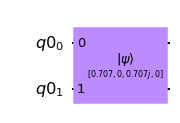

In [5]:
qr_init = QuantumRegister(n)

qc_init = QuantumCircuit(qr_init)
qc_init.initialize(target_state) # the initialization

qc_init.draw('mpl')

### Method 2: Using quantum gates

Note: this is useful when you either know or can decipher which gates can be used to generate a state


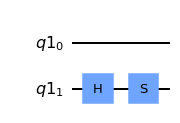

In [6]:
qr_gate = QuantumRegister(n)

qc_gate = QuantumCircuit(qr_gate)

qc_gate.h(qr_gate[1])
qc_gate.s(qr_gate[1])

qc_gate.draw('mpl')

Not convinced that the circuit above generates the same target state? You can verify it for yourself! Let's see how to retrieve the state of a circuit.

## Retrieving the State of a Circuit

### Method 1: Using Statevector from quantum_info

In [7]:
from qiskit.quantum_info import Statevector

qc_gate_statevector = Statevector(qc_gate) # alternative: qc_gate_statevector = quantum_info.Statevector.from_instruction(qc_gate)

qc_gate_statevector.draw('latex', prefix = '|\\psi_{qc-gate-statevector}> = ')

<IPython.core.display.Latex object>

### Method 2: Using Aer's Statevector Simulator

In [8]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc_gate, backend)
qc_gate_state_sim = job.result().get_statevector()

array_to_latex(qc_gate_state_sim, prefix = '|\\psi_{qc-gate-sim}> = ') # Note .draw() isn't used here, because .get_statevector() returns an array

<IPython.core.display.Latex object>

Convinced yet? If you need just a little more of a nudge, you can always check the fidelity!

## Fidelity: state_fidelity from quantum_info

In [9]:
from qiskit.quantum_info import state_fidelity

print('Target state and qc_gate_statevector: ')
display(state_fidelity(target_state, qc_gate_statevector))

print('\nTarget state and qc_gate_state_sim: ')
display(state_fidelity(target_state, qc_gate_state_sim))


Target state and qc_gate_statevector: 


0.9999999999999996


Target state and qc_gate_state_sim: 


0.9999999999999998

Now let's see what this state of ours looks like.

## State Visualization


Note: For an explanation of each of the visualizations, check out: [Qiskit Tutorial: Plotting Data in Qiskit](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/qiskit/circuits/2_plotting_data_in_qiskit.ipynb)

### Qsphere - Method 1: .draw()

Note: .draw() has the following options for drawing Statevector objects: 'text', 'latex', 'latex_source', 'qsphere', 'hinton','bloch' or 'auto'.

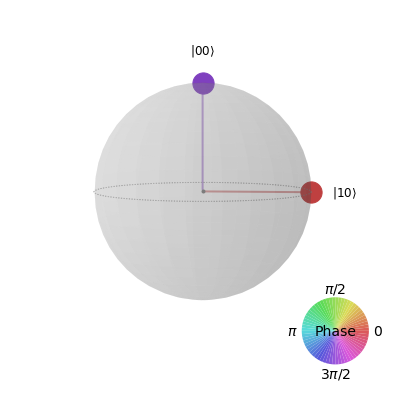

In [10]:
qc_gate_statevector.draw('qsphere')

### Qsphere - Method 2: plot_state_qsphere from qiskit.visualization

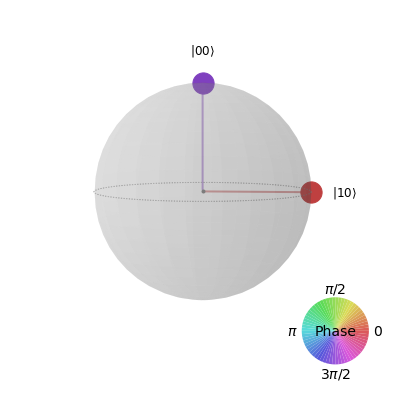

In [11]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(qc_gate_statevector)

### Bloch Multivector - Method 1: .draw()

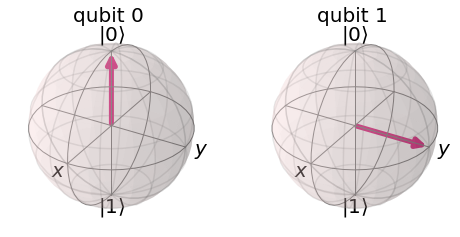

In [12]:
qc_gate_statevector.draw('bloch')

### Bloch Multivector - Method 2: plot_bloch_multivector from qiskit.visualization

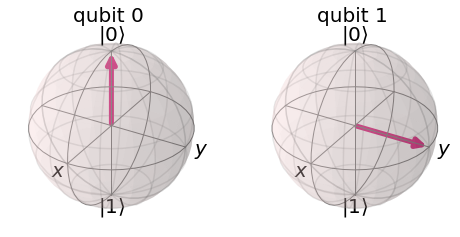

In [13]:
from qiskit. visualization import plot_bloch_multivector

plot_bloch_multivector(qc_gate_statevector)

### State Vector in Pauli Basis

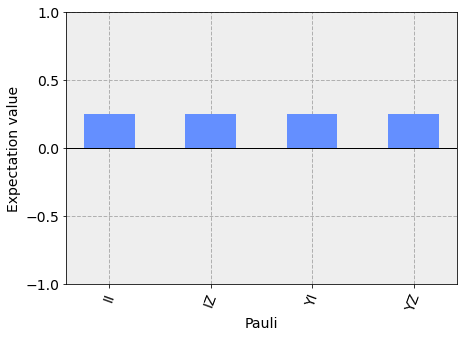

In [14]:
from qiskit.visualization import plot_state_paulivec

plot_state_paulivec(qc_gate_statevector)

### Brief Digression: Density Matrix of a State using DensityMatrix from quantum_info

For the next few visualizations we need to consider the density matrix of the state, not its state vector.

The density matrix of a state $|\psi >$ is $\rho = |\psi > < \psi| $.

**Method 1: Retrieve density matrix from a circuit.**

In [15]:
from qiskit.quantum_info import DensityMatrix

rho = DensityMatrix(qc_gate) #alternative: rho = quantum_info.DensityMatrix.from_instruction(qc_gate)

rho.draw('latex', prefix = '\\rho = ')

<IPython.core.display.Latex object>

**Method 2: Provide density matrix as a numpy array**

This is if you've calculated it by hand. Remember in order to calculate it, you must use the mathematically correct $|\psi_{m} >$ we defined at the beginning, not  $|\psi_{ts} >$, otherwise your minus signs might get wonky!

So the density matrix would be: $\rho = |\psi_{m} >< \psi_{m}|$ 


In [16]:
rho_m_matrix = np.array([[1/2,0,complex(0,-1/2),0],[0,0,0,0],[complex(0,1/2),0,1/2,0],[0,0,0,0]])

rho_m = DensityMatrix(rho_m_matrix)
display(rho_m.draw('latex', prefix='\\rho = '))

<IPython.core.display.Latex object>

Or we could just get python to do it for us:

In [17]:
ket_target_state = np.matrix(target_state).T
bra_target_state  = ket_target_state.conj().T

display(array_to_latex(ket_target_state, prefix = '|\\psi_m> = ' ))
display(array_to_latex(bra_target_state, prefix = '<\\psi_m| = ' ))

target_state_matrix = np.matmul(ket_target_state, bra_target_state)

rho = DensityMatrix(target_state_matrix)
display(rho.draw('latex', prefix='\\rho = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Visualization time.

### State City Plot

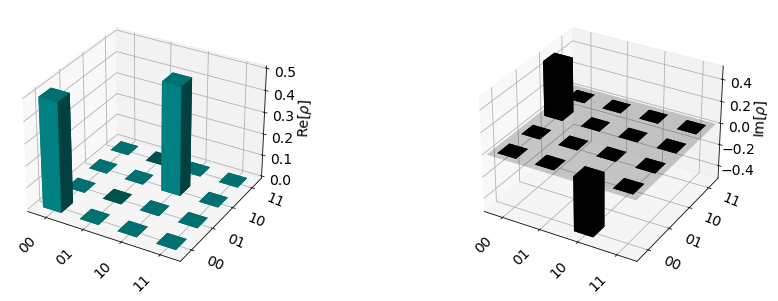

In [18]:
from qiskit.visualization import plot_state_city

plot_state_city(rho, color = ['teal', 'black']) # colors cuz I felt like prettying it up

### State Hinton - Method 1: .draw()

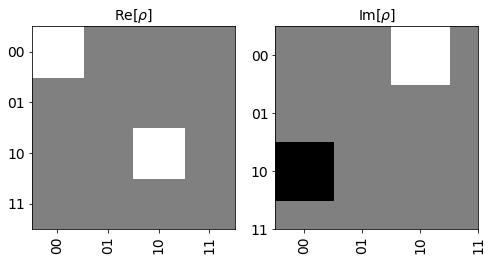

In [19]:
rho.draw('hinton')

### State Hinton - Method 2: plot_state_hinton from qiskit.visualization

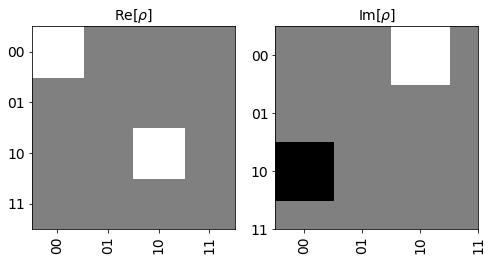

In [20]:
from qiskit.visualization import plot_state_hinton

plot_state_hinton(rho)

## State Evolution

### Method 1: Evolve a State by a Circuit using quantum_info Statevector

Let's apply Hadamards to both qubits.


 Initial state: 


<IPython.core.display.Latex object>

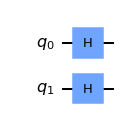


 Final state:  


<IPython.core.display.Latex object>

In [21]:
from qiskit.quantum_info import Statevector

init_state = Statevector(qc_init)
print('\n Initial state: ')
display(init_state.draw('latex', prefix = '|\\psi_{ts}> ='))

# create circuit with Hadamards operating on each qubit
qc_hadamards = QuantumCircuit(n) 
qc_hadamards.h(range(n))  

display(qc_hadamards.draw('mpl'))

new_state = init_state.evolve(qc_hadamards)

print('\n Final state:  ')
display(new_state.draw('latex', prefix= '|\\psi_{f}> ='))




This is essentially applying the circuit operations to the state. You can verity this by using $qc$_$init$:

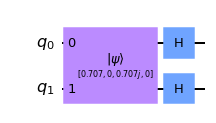


 State of circuit qc_init + qc_hadamards = 


<IPython.core.display.Latex object>

In [22]:
qc_combined = qc_hadamards.compose(qc_init, range(n), front = True)

display(qc_combined.draw('mpl'))

qc_combined_state = Statevector(qc_combined)

print('\n State of circuit qc_init + qc_hadamards = ')
display(qc_combined_state.draw('latex'))

The same thing can be done with operators.

### Method 2: Evolve a State using quantum_info Operator

In [23]:
from qiskit.quantum_info import Operator

display(rho.draw('latex', prefix='Initial State, \\rho = '))

H = Operator.from_label('H') #fetches the Hadamard
display(array_to_latex(H.data, prefix ='H = '))



HH = H.expand(H) # tensor product of H with itself
display(array_to_latex(HH.data, prefix ='H \\otimes H = '))

rho_HH = rho.evolve(HH)
display(rho_HH.draw('latex', prefix='\\rho_f = H\\rho H^\\dagger = '))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

You can easily verify that $\rho_f$ is the density matrix corresponding to the final state $|\psi_f>$ by calculating it:

In [24]:
ket_combined_state = np.matrix(qc_combined_state).T
bra_combined_state  = ket_combined_state.conj().T

display(array_to_latex(ket_combined_state, prefix = '|\\psi_f> = ' ))
display(array_to_latex(bra_combined_state, prefix = '<\\psi_f| = ' ))

combined_state_matrix = np.matmul(ket_combined_state, bra_combined_state)

rho_comb = DensityMatrix(combined_state_matrix)
display(rho_comb.draw('latex', prefix='\\rho_f = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## More to Explore

- [Qiskit Tutorial: Plotting Data in Qiskit](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/qiskit/circuits/2_plotting_data_in_qiskit.ipynb)
- [Qiskit Tutorial: Operator Flow](https://github.com/Qiskit/qiskit-tutorials/tree/master/tutorials/operators)
- [Qiskit Documentation](https://qiskit-community.github.io/qiskit-translations/de_DE/)


Created by quantum-kittens